# 1. Import Libraries

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Import Dataset

## Import Rating Dataset 

In [2]:
df_rating= pd.read_csv('u.data')
df_rating.head()

,0\t50\t5\t881250949
0,0\t172\t5\t881250949
1,0\t133\t1\t881250949
2,196\t242\t3\t881250949
3,186\t302\t3\t891717742
4,22\t377\t1\t878887116


In [3]:
df_rating = pd.read_csv('u.data', sep='\t', names = ['user_id', 'item_id', 'rating', 'timestamp'])
df_rating.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


### Data Information

In [4]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100003 non-null  int64
 1   item_id    100003 non-null  int64
 2   rating     100003 non-null  int64
 3   timestamp  100003 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [5]:
df_rating.shape

(100003, 4)

### Data Description

In [6]:
df_rating.describe()

,user_id,item_id,rating,timestamp
count,100003.000000,100003.000000,100003.000000,1.000030e+05
mean,462.470876,425.520914,3.529864,8.835288e+08
std,266.622454,330.797791,1.125704,5.343791e+06
min,0.000000,1.000000,1.000000,8.747247e+08
25%,254.000000,175.000000,3.000000,8.794487e+08
50%,447.000000,322.000000,4.000000,8.828269e+08
75%,682.000000,631.000000,4.000000,8.882600e+08
max,943.000000,1682.000000,5.000000,8.932866e+08


## Import Movie Dataset

In [51]:
df_movie = pd.read_csv('Movie_Id_Titles')
df_movie.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


### Data Information

In [8]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   item_id  1682 non-null   int64 
 1   title    1682 non-null   object
dtypes: int64(1), object(1)
memory usage: 26.4+ KB


In [9]:
df_movie.shape

(1682, 2)

### Data Description

In [10]:
df_movie.describe()

,item_id
count,1682.000000
mean,841.500000
std,485.695893
min,1.000000
25%,421.250000
50%,841.500000
75%,1261.750000
max,1682.000000


In [11]:
df_movie.describe(include='O')

,title
count,1682
unique,1664
top,"Designated Mourner, The (1997)"
freq,2


### Merging the dataset

In [12]:
df = pd.merge(df_rating, df_movie, on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100003 entries, 0 to 100002
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    100003 non-null  int64 
 1   item_id    100003 non-null  int64 
 2   rating     100003 non-null  int64 
 3   timestamp  100003 non-null  int64 
 4   title      100003 non-null  object
dtypes: int64(4), object(1)
memory usage: 4.6+ MB


In [14]:
df.shape

(100003, 5)

In [15]:
df.describe()

,user_id,item_id,rating,timestamp
count,100003.000000,100003.000000,100003.000000,1.000030e+05
mean,462.470876,425.520914,3.529864,8.835288e+08
std,266.622454,330.797791,1.125704,5.343791e+06
min,0.000000,1.000000,1.000000,8.747247e+08
25%,254.000000,175.000000,3.000000,8.794487e+08
50%,447.000000,322.000000,4.000000,8.828269e+08
75%,682.000000,631.000000,4.000000,8.882600e+08
max,943.000000,1682.000000,5.000000,8.932866e+08


In [16]:
df.describe(include='O')

,title
count,100003
unique,1664
top,Star Wars (1977)
freq,584


# 3. Exploratory Data Analysis (EDA)

In [17]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


### Top 10 Film Recommendation Based on Rating Average

In [18]:
top10_film_rating = pd.DataFrame(df.groupby('title')['rating'].mean().sort_values(ascending=False))
top10_film_rating.head(10)

,rating
title,
They Made Me a Criminal (1939),5.0
Marlene Dietrich: Shadow and Light (1996),5.0
"Saint of Fort Washington, The (1993)",5.0
Someone Else's America (1995),5.0
Star Kid (1997),5.0
"Great Day in Harlem, A (1994)",5.0
Aiqing wansui (1994),5.0
Santa with Muscles (1996),5.0
Prefontaine (1997),5.0


### Count the number of people that giving a rating

In [19]:
count_rate = pd.DataFrame(df.groupby('title')['rating'].count().sort_values(ascending=False))
count_rate.head(10)

,rating
title,
Star Wars (1977),584
Contact (1997),509
Fargo (1996),508
Return of the Jedi (1983),507
Liar Liar (1997),485
"English Patient, The (1996)",481
Scream (1996),478
Toy Story (1995),452
Air Force One (1997),431


### Rating average each film

In [20]:
avg_rate= pd.DataFrame(df.groupby('title')['rating'].mean())
avg_rate.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


### Quantity of film rating

In [21]:
avg_rate['vote_count'] = df.groupby('title')['rating'].count()
avg_rate.head()

,rating,vote_count
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


### Visualize rating column

<AxesSubplot:>

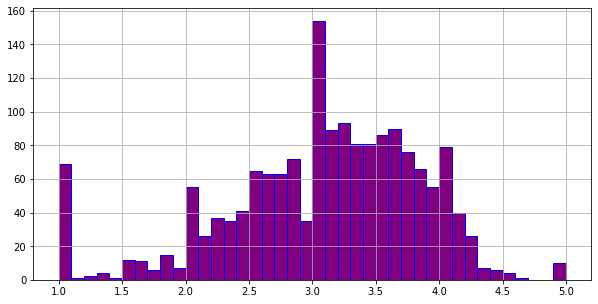

In [22]:
plt.figure(figsize=(10,5))
avg_rate['rating'].hist(bins=40, edgecolor='b', color='purple')

### Visualize rating vs num_of_people

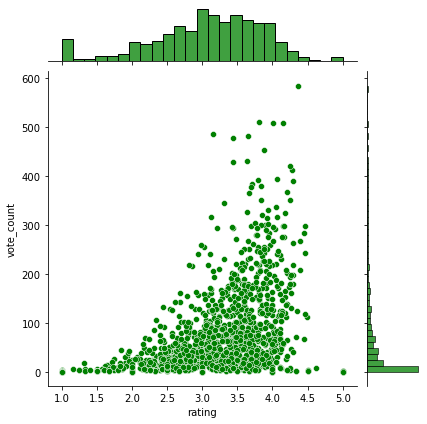

In [23]:
sns.jointplot(x= 'rating', y= 'vote_count', data=avg_rate, color='g')

In [24]:
film_matrix = df.pivot_table(index='user_id',columns='title',values='rating')
film_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
film_matrix.fillna(0, inplace=True)

In [26]:
film_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


`Zero value referred to the people who never watched that film`

In [58]:
avg_rate.to_csv('metadata.csv')

In [59]:
df=pd.read_csv('metadata.csv')
df.head()

,title,rating,vote_count
0,'Til There Was You (1997),2.333333,9
1,1-900 (1994),2.600000,5
2,101 Dalmatians (1996),2.908257,109
3,12 Angry Men (1957),4.344000,125
4,187 (1997),3.024390,41


# 4. Create a Recommender System 

## Calculate IMDb Score

### Formula of IMDb Score
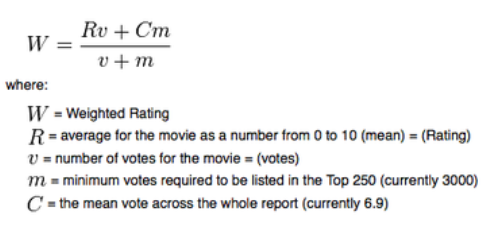

## $m$

<AxesSubplot:>

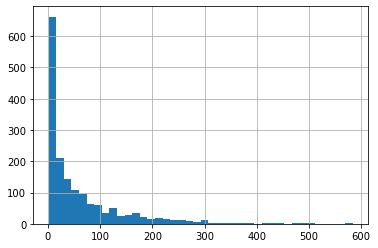

In [29]:
df.vote_count.hist(bins = 40)

In [30]:
m = df.vote_count.quantile(0.8)

m

101.0

## $C$

In [31]:
C = (df.rating * df.vote_count).sum() / df.vote_count.sum()
C

3.5298641040768777

## Create a function of IMDb Score

In [32]:
def imdb_score (df, q = 0.8):
    df = df.copy()
    m = df.vote_count.quantile(q)
    C = (df.rating * df.vote_count).sum() / df.vote_count.sum()
    
    df = df[df.vote_count >= m]
    df['score'] =  df.apply(lambda x: (x.rating * x.vote_count  + C*m)/(x.vote_count + m), axis = 1)
    
    return df

In [33]:
df = imdb_score(df)
df.head()

,title,rating,vote_count,score
2,101 Dalmatians (1996),2.908257,109,3.207220
3,12 Angry Men (1957),4.344000,125,3.980161
7,2001: A Space Odyssey (1968),3.969112,259,3.845879
15,Absolute Power (1997),3.370079,127,3.440861
16,"Abyss, The (1989)",3.589404,151,3.565541


## Demographic Filtering

In [34]:
#STEP 1
class RecommenderSystem:
    def __init__(self, data):
        self.df = pd.read_csv(data)

        
#STEP 2
    def recommend (self, rating = None, vote_count=None, topk = 10):
        df = self.df.copy()
        df = self.demographic_filter (df, rating = rating, vote_count= vote_count)
        df = self.compute_imdb_score(df)

        result = df.loc[:, 'title':'score']
        result = result.sort_values('score', ascending = False)
        result = result.head(topk)
        return result
     
#STEP 3
    @staticmethod
    def demographic_filter(df, rating = None, vote_count=None):
        df = df.copy()
        
        if rating is not None:
            df = df[df.rating.between(rating[0], rating[1])]
            
        if vote_count is not None:
            df = df[df.vote_count.between(vote_count[0], vote_count[1])]
        
        return df       
    

#STEP 4
    @staticmethod
    def compute_imdb_score (df, q= 0.8):
        df = df.copy()
        
        m = df.vote_count.quantile(q)
        C = (df.rating * df.vote_count).sum() / df.vote_count.sum()

        df = df[df.vote_count >= m]
        df['score'] =  df.apply(lambda x: (x.rating * x.vote_count  + C*m) / (x.vote_count + m), axis = 1)
        return df


In [35]:
recsys = RecommenderSystem(data='metadata.csv')

In [36]:
recsys.recommend()

,title,rating,vote_count,score
1398,Star Wars (1977),4.359589,584,4.237250
1281,Schindler's List (1993),4.466443,298,4.229364
1317,"Shawshank Redemption, The (1994)",4.445230,283,4.204469
273,Casablanca (1942),4.456790,243,4.184640
1572,"Usual Suspects, The (1995)",4.385768,267,4.150859
612,"Godfather, The (1972)",4.283293,413,4.135246
1329,"Silence of the Lambs, The (1991)",4.289744,390,4.133434
1205,Raiders of the Lost Ark (1981),4.252381,420,4.112315
1215,Rear Window (1954),4.387560,209,4.108117
1500,Titanic (1997),4.245714,350,4.085402


### Film Recomendation based on vote_count

In [37]:
recsys.recommend(vote_count=(100,200))

,title,rating,vote_count,score
303,Citizen Kane (1941),4.292929,198,3.962032
621,Good Will Hunting (1997),4.262626,198,3.945772
1077,North by Northwest (1959),4.284916,179,3.939971
433,Dr. Strangelove or: How I Learned to Stop Worr...,4.252577,194,3.936959
1580,Vertigo (1958),4.251397,179,3.922828
851,Lawrence of Arabia (1962),4.231214,173,3.906948
1456,Taxi Driver (1976),4.120879,182,3.858329
610,Glory (1989),4.076023,171,3.827456
883,Lone Star (1996),4.053476,187,3.826788
1016,Much Ado About Nothing (1993),4.062500,176,3.824179


In [38]:
recsys.recommend(vote_count=(300,400))

,title,rating,vote_count,score
1329,"Silence of the Lambs, The (1991)",4.289744,390,4.079992
1190,Pulp Fiction (1994),4.060914,394,3.964412
293,Chasing Amy (1997),3.839050,379,3.851541
1543,Twelve Monkeys (1995),3.798469,392,3.830692
780,Jerry Maguire (1996),3.710938,384,3.786966


In [39]:
recsys.recommend(vote_count=(400,500))

,title,rating,vote_count,score
460,"English Patient, The (1996)",3.656965,481,3.678970
860,Liar Liar (1997),3.156701,485,3.427399


In [40]:
recsys.recommend(vote_count=(500,600))

,title,rating,vote_count,score
1398,Star Wars (1977),4.359589,584,4.230943


### Film Recommendation based on rating

In [41]:
recsys.recommend(rating=(4,5))

,title,rating,vote_count,score
1281,Schindler's List (1993),4.466443,298,4.348985
1317,"Shawshank Redemption, The (1994)",4.445230,283,4.332841
273,Casablanca (1942),4.456790,243,4.329017
1398,Star Wars (1977),4.359589,584,4.312144
1572,"Usual Suspects, The (1995)",4.385768,267,4.294831
1215,Rear Window (1954),4.387560,209,4.282792
1329,"Silence of the Lambs, The (1991)",4.289744,390,4.250164
612,"Godfather, The (1972)",4.283293,413,4.247294
1102,One Flew Over the Cuckoo's Nest (1975),4.291667,264,4.240469
1507,To Kill a Mockingbird (1962),4.292237,219,4.235243


In [42]:
recsys.recommend(rating=(3,4))

,title,rating,vote_count,score
109,Babe (1995),3.995434,219,3.832816
7,2001: A Space Odyssey (1968),3.969112,259,3.832008
747,Indiana Jones and the Last Crusade (1989),3.930514,331,3.825680
44,Aliens (1986),3.947183,284,3.825211
1461,"Terminator, The (1984)",3.933555,301,3.820483
572,"Full Monty, The (1997)",3.926984,315,3.819384
88,Apollo 13 (1995),3.931159,276,3.811849
623,GoodFellas (1990),3.951327,226,3.807873
1523,Toy Story (1995),3.878319,452,3.806874
249,Butch Cassidy and the Sundance Kid (1969),3.949074,216,3.802288


In [43]:
recsys.recommend(rating=(2,3))

,title,rating,vote_count,score
476,Evita (1996),2.980695,259,2.940614
378,Dante's Peak (1997),2.933333,240,2.897236
891,"Lost World: Jurassic Park, The (1997)",2.943038,158,2.890017
1043,Natural Born Killers (1994),2.953125,128,2.888230
442,Dumb & Dumber (1994),3.000000,69,2.882756
1152,Picture Perfect (1997),2.962963,81,2.869546
1085,"Nutty Professor, The (1996)",2.914110,163,2.868052
1214,Reality Bites (1994),2.961039,77,2.865071
203,Body Snatchers (1993),2.971014,69,2.864340
1334,Sirens (1994),2.983051,59,2.860723


In [44]:
recsys.recommend(rating=(1,2))

,title,rating,vote_count,score
632,Grease 2 (1982),2.000000,24,1.949395
676,Hellraiser: Bloodline (1996),2.000000,18,1.936744
1421,"Stupids, The (1996)",2.000000,17,1.933993
1000,Mortal Kombat: Annihilation (1997),1.953488,43,1.928201
799,Jury Duty (1995),2.000000,14,1.924092
356,"Crow: City of Angels, The (1996)",1.948718,39,1.921819
1328,Showgirls (1995),1.956522,23,1.913167
1622,White Man's Burden (1995),2.000000,10,1.905116
124,Barb Wire (1996),1.933333,30,1.902274
742,In the Realm of the Senses (Ai no corrida) (1976),2.000000,9,1.898790


### Film Recommendation based on both

In [45]:
recsys.recommend(rating=(4,5), vote_count=(300,400))

,title,rating,vote_count,score
1329,"Silence of the Lambs, The (1991)",4.289744,390,4.224140
1190,Pulp Fiction (1994),4.060914,394,4.108829


In [46]:
recsys.recommend(rating=(3,5), vote_count=(300,400))

,title,rating,vote_count,score
1329,"Silence of the Lambs, The (1991)",4.289744,390,4.079992
1190,Pulp Fiction (1994),4.060914,394,3.964412
293,Chasing Amy (1997),3.839050,379,3.851541
1543,Twelve Monkeys (1995),3.798469,392,3.830692
780,Jerry Maguire (1996),3.710938,384,3.786966


In [47]:
recsys.recommend(rating=(3,4), vote_count=(250,500))

,title,rating,vote_count,score
1523,Toy Story (1995),3.878319,452,3.785938
293,Chasing Amy (1997),3.839050,379,3.757385
1543,Twelve Monkeys (1995),3.798469,392,3.738114
780,Jerry Maguire (1996),3.710938,384,3.693393
460,"English Patient, The (1996)",3.656965,481,3.665165
32,Air Force One (1997),3.631090,431,3.651894
744,Independence Day (ID4) (1996),3.438228,429,3.549471
1284,Scream (1996),3.441423,478,3.544889
860,Liar Liar (1997),3.156701,485,3.384113
